# Project: Post Disaster Sentiment Analysis 
## Nick Giorgio & Leila Moinpour

### Research Questions: 
##### Part 1. How does public sentiment evolve over the course of a natural disaster and its recovery? Specifically, for Hurricane Harvey in 2017?  
##### Part 2. How does sentiment compare between multiple different disaster types in the USA? 

### Data  
##### Crisis NLP has exported annotated tweets for a number of disaster events around the world. We'll use the publically avaiable data, events set 1, provided on the site.

In [2]:
import pandas as pd
from textblob import TextBlob
import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\lmoin\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lmoin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Testing Sentiment function

In [3]:
sentence = TextBlob('So mad the fires have destroyed so many homes.))')
print(sentence.sentiment)

Sentiment(polarity=-0.0625, subjectivity=0.75)


## Loading Tweet Data from the Disaster Event

In [4]:
#data_cat = pd.read_csv('HumAID_data_all_combined/all_combined/all_train_categories.tsv', sep='\t')
#len(data_cat)

#### Pulled event data for Hurricane Harvey 2017 below

In [5]:
event_df = pd.read_csv('HumAID_data_events_set1_47K/events_set1/hurricane_harvey_2017/hurricane_harvey_2017_train.tsv', sep='\t')
len(event_df)

6378

In [6]:
print(len(event_df))            # Number of rows
print(event_df.columns)         # Column names
print(event_df.head())          # First 5 rows

6378
Index(['tweet_id', 'tweet_text', 'class_label'], dtype='object')
             tweet_id                                         tweet_text  \
0  903388763073720321  Hurricane Harvey killed at least 38 people, bu...   
1  901136425348759552  Harvey upped to Category 2 hurricane with 110+...   
2  902853707607535616  A huge shoutout @TexasGuard for all the work y...   
3  902859729701044224  Our thoughts and prayers are with the people h...   
4  901405975856414720  Homes destroyed on Broadway St in Rockport. Pe...   

                              class_label  
0                  injured_or_dead_people  
1              other_relevant_information  
2  rescue_volunteering_or_donation_effort  
3                    sympathy_and_support  
4       infrastructure_and_utility_damage  


## Going through each text column and calculating its sentiment score using Textblob

In [7]:
event_sentiment = []
for c in event_df['tweet_text']:
    event_sentiment.append(TextBlob(c).sentiment.polarity)

for i in range(20):
    print("Sentiment:", round(event_sentiment[i], 2), "Comment:", event_df['tweet_text'].iloc[i])

Sentiment: 0.0 Comment: Hurricane Harvey killed at least 38 people, but Charlie Hebdo mag says thats OK because they were neo-Nazis.
Sentiment: -0.1 Comment: Harvey upped to Category 2 hurricane with 110+ mph winds and flooding expected
Sentiment: 0.4 Comment: A huge shoutout @TexasGuard for all the work your #USArmy Soldiers are doing to help victims of #HurricaneHarvey #HelpForHouston
Sentiment: 0.0 Comment: Our thoughts and prayers are with the people hit by hurricane Harvey. If you know of a fellow maker who is in
Sentiment: 0.0 Comment: Homes destroyed on Broadway St in Rockport. People seen on street huddling &amp; hugging. #HurricaneHarvey #Texas
Sentiment: 0.46 Comment: @realDonaldTrump on top of the tremendous devastation &amp; flooding from Harvey; gutted EPA will not act on airborne petrochemical pollution !?
Sentiment: 0.0 Comment: UIL Statement Re: Displaced Student from Hurricane Harvey -  -- @steveat21 @vsa_texas @TXMileSplit @txrunning
Sentiment: 0.31 Comment: Calling a

#### Cleaning up the text in the "text" column of the wildfire DataFrame by removing links, usernames, hashtags, special characters, and extra spaces, and then saving the cleaned version in a new column called cleaned_text

In [8]:
import re

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|pic\.twitter\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
event_df['cleaned_text'] = event_df['tweet_text'].apply(clean_text)

In [9]:
for i in range(20):
    print("Sentiment:", round(event_sentiment[i], 2), "Comment:", event_df['cleaned_text'].iloc[i])

Sentiment: 0.0 Comment: Hurricane Harvey killed at least 38 people but Charlie Hebdo mag says thats OK because they were neoNazis
Sentiment: -0.1 Comment: Harvey upped to Category 2 hurricane with 110 mph winds and flooding expected
Sentiment: 0.4 Comment: A huge shoutout for all the work your Soldiers are doing to help victims of
Sentiment: 0.0 Comment: Our thoughts and prayers are with the people hit by hurricane Harvey If you know of a fellow maker who is in
Sentiment: 0.0 Comment: Homes destroyed on Broadway St in Rockport People seen on street huddling amp hugging
Sentiment: 0.46 Comment: on top of the tremendous devastation amp flooding from Harvey gutted EPA will not act on airborne petrochemical pollution
Sentiment: 0.0 Comment: UIL Statement Re Displaced Student from Hurricane Harvey
Sentiment: 0.31 Comment: Calling all chefs Please join us in supporting the victims of Donate the proceeds of one featured dish RT
Sentiment: 0.03 Comment: In coastal areas both terrestrial floodi

## Cleaning data and filtering for english only

In [10]:
#pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [12]:
import re
from langdetect import detect, LangDetectException

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|pic\.twitter\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


def is_english(text):
    try:
        return detect(text) == 'en'
    except LangDetectException:
        return False

event_df = event_df[event_df['cleaned_text'].apply(is_english)].reset_index(drop=True)

## Checking new cleaned text column

In [13]:
event_df.head()

,tweet_id,tweet_text,class_label,cleaned_text
0,903388763073720321,"Hurricane Harvey killed at least 38 people, bu...",injured_or_dead_people,Hurricane Harvey killed at least 38 people but...
1,901136425348759552,Harvey upped to Category 2 hurricane with 110+...,other_relevant_information,Harvey upped to Category 2 hurricane with 110 ...
2,902853707607535616,A huge shoutout @TexasGuard for all the work y...,rescue_volunteering_or_donation_effort,A huge shoutout for all the work your Soldiers...
3,902859729701044224,Our thoughts and prayers are with the people h...,sympathy_and_support,Our thoughts and prayers are with the people h...
4,901405975856414720,Homes destroyed on Broadway St in Rockport. Pe...,infrastructure_and_utility_damage,Homes destroyed on Broadway St in Rockport Peo...


In [14]:
# event_df = event_df.drop(columns=['tweet_text'])
# do this if data is overloading server

In [15]:
event_df['class_label'].isna().any()

False

In [16]:
#add sentiment column to the dataframe
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
event_df['sentiment'] = event_df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lmoin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
event_df.head()

,tweet_id,tweet_text,class_label,cleaned_text,sentiment
0,903388763073720321,"Hurricane Harvey killed at least 38 people, bu...",injured_or_dead_people,Hurricane Harvey killed at least 38 people but...,0.2845
1,901136425348759552,Harvey upped to Category 2 hurricane with 110+...,other_relevant_information,Harvey upped to Category 2 hurricane with 110 ...,0.0000
2,902853707607535616,A huge shoutout @TexasGuard for all the work y...,rescue_volunteering_or_donation_effort,A huge shoutout for all the work your Soldiers...,0.4019
3,902859729701044224,Our thoughts and prayers are with the people h...,sympathy_and_support,Our thoughts and prayers are with the people h...,0.0000
4,901405975856414720,Homes destroyed on Broadway St in Rockport. Pe...,infrastructure_and_utility_damage,Homes destroyed on Broadway St in Rockport Peo...,-0.1027


## Plotting sentiment change over time. Converterd the timestamp into year-month-date format

In [18]:
#use this for crisis NLP's first data set which does not contain date column. Generate this from Tweet ID

import datetime

def tweet_id_to_datetime(tweet_id):
    # Twitter epoch: November 4, 2010 in milliseconds
    twitter_epoch = 1288834974657

    # Convert tweet ID to timestamp in milliseconds
    timestamp_ms = (int(tweet_id) >> 22) + twitter_epoch

    # Convert to datetime
    dt = datetime.datetime.utcfromtimestamp(timestamp_ms / 1000)
    return dt

tweet_id = 903388763073720321
print(tweet_id_to_datetime(tweet_id))

event_df['date'] = event_df['tweet_id'].apply(tweet_id_to_datetime)

2017-08-31 22:47:19.925000


In [19]:
event_df.head()

,tweet_id,tweet_text,class_label,cleaned_text,sentiment,date
0,903388763073720321,"Hurricane Harvey killed at least 38 people, bu...",injured_or_dead_people,Hurricane Harvey killed at least 38 people but...,0.2845,2017-08-31 22:47:19.925
1,901136425348759552,Harvey upped to Category 2 hurricane with 110+...,other_relevant_information,Harvey upped to Category 2 hurricane with 110 ...,0.0000,2017-08-25 17:37:20.765
2,902853707607535616,A huge shoutout @TexasGuard for all the work y...,rescue_volunteering_or_donation_effort,A huge shoutout for all the work your Soldiers...,0.4019,2017-08-30 11:21:12.761
3,902859729701044224,Our thoughts and prayers are with the people h...,sympathy_and_support,Our thoughts and prayers are with the people h...,0.0000,2017-08-30 11:45:08.540
4,901405975856414720,Homes destroyed on Broadway St in Rockport. Pe...,infrastructure_and_utility_damage,Homes destroyed on Broadway St in Rockport Peo...,-0.1027,2017-08-26 11:28:26.614


In [20]:
#lets group by month and assign to new df to understand why the data looked funky in plot
df_monthly = event_df.groupby(event_df['date'].dt.to_period('M'))['sentiment'].mean()
df_monthly.head()

date
2017-08    0.029698
2017-09    0.028895
Freq: M, Name: sentiment, dtype: float64

In [21]:
#this particular data set is only 8 days
earliest_date = event_df['date'].min()
latest_date = event_df['date'].max()

print("Earliest date:", earliest_date)
print("Latest date:", latest_date)

Earliest date: 2017-08-25 00:00:01.923000
Latest date: 2017-09-01 23:59:46.094000


##### Hurricane Harvey's initial impact lasted from August 25th-29th with the final landfall on the August 30th. 


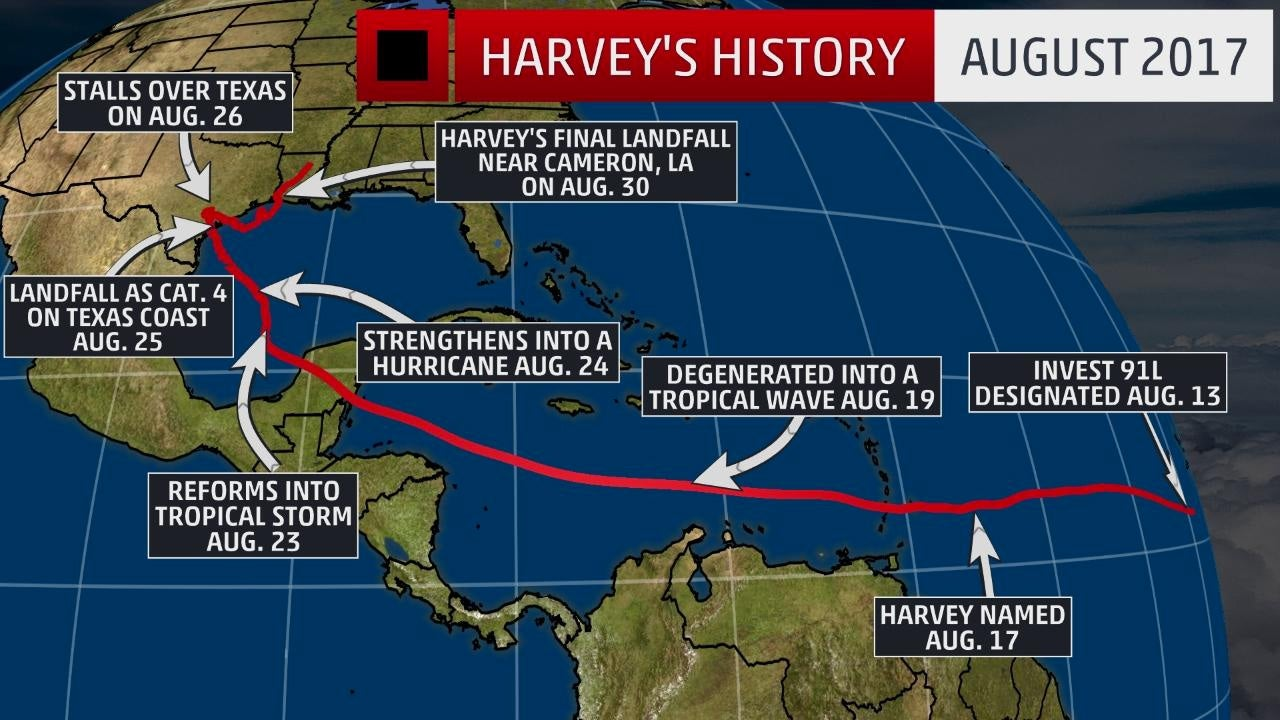

In [22]:
from IPython.display import Image, display

display(Image(filename='harvey-recap.jpg'))

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

#use this for Crisis NLP's second data set containing the timestamps as a column. 
#event_df['date'] = pd.to_datetime(event_df['timestamp'], unit='d', origin='1899-12-30')

### Sentiment Changes over Days for Event
##### Initially, sentiment is negative while the event is occuring, and starts to trend more positively as the hurricane moves away from Texas and begins to dissapate by the 2nd. A majority of the impact occurred between August 26th to 28th. 

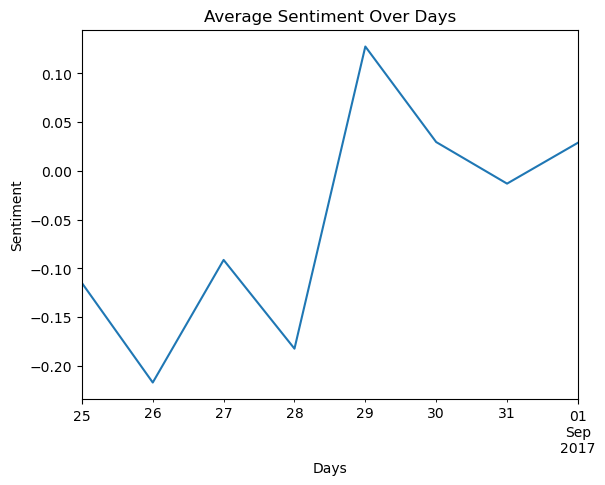

In [24]:
event_df.groupby(event_df['date'].dt.to_period('D'))['sentiment'].mean().plot()
plt.title('Average Sentiment Over Days')
plt.ylabel('Sentiment')
plt.xlabel('Days')
plt.show()

In [ ]:
#print(event_df['sentiment'].unique())

In [25]:
# Statisics for Overall Sentiment regarding Hurricane Harvey
print(event_df['sentiment'].describe())

count    6311.000000
mean        0.029499
std         0.480658
min        -0.948500
25%        -0.381800
50%         0.000000
75%         0.440400
max         0.957100
Name: sentiment, dtype: float64


# Examining positive and negative sentiment tweets 

In [26]:
top_positive = event_df.sort_values(by='sentiment', ascending=False).head(10)
for i, row in top_positive.iterrows():
    print(f"Sentiment: {row['sentiment']:.2f} | Text: {row['cleaned_text']}")

Sentiment: 0.96 | Text: Free Pizza Free shirt Free OKC zoo tickets chance to win an ipadamp your blood can help the Hurricane victims Help us make a difference
Sentiment: 0.95 | Text: Im Asking My NYC Friends To PLEASE Put Aside Gently Used Clothes 4 Hurricane Harvey Relief Efforts More Details 2 Come feeling hopeful
Sentiment: 0.94 | Text: We here at team Redneck want to help our Texas friends who need a hand Help us help them and get a cool shirt in the process
Sentiment: 0.94 | Text: Support the local relief efforts in Houston TX Be excellent to one another and help out by donating
Sentiment: 0.94 | Text: BIG thanks to Jerry Jones for the generous 100k relief donation We are so blessed by your partnership
Sentiment: 0.93 | Text: Thanks Good Morning America Happy to help any way we can Thanks for unifying us
Sentiment: 0.93 | Text: Petal Firefighters are heading to TX to help with relief efforts Join me in wishing them safe travels
Sentiment: 0.93 | Text: PLEASE READ if you wish to h

In [27]:
top_negative = event_df.sort_values(by='sentiment', ascending=True).head(10)
for i, row in top_negative.iterrows():
    print(f"Sentiment: {row['sentiment']:.2f} | Text: {row['cleaned_text']}")

Sentiment: -0.95 | Text: Stupid ass pic Katrina killed 1800 known for sure dead had no other option to survive
Sentiment: -0.94 | Text: Huston is dead ass fucked the dam broke a school is being held hostage by shooters and people are dieing because of hurricane Harvey
Sentiment: -0.94 | Text: Anyone who robs people during a crisis should be shot dead Stupid scum bags
Sentiment: -0.94 | Text: 730 am and i just broke down sobbing seeing these pictures of dogs trapped in the floods from hurricane harveyi am so heartbroken
Sentiment: -0.93 | Text: New this morning More than 18thousand evacuees from Hurricane Harvey in Texas this morning with 9 killed Many missing and feared dead
Sentiment: -0.93 | Text: Hurricane Harvey churns deeper into Texas but loses force at least one dead but full scope of damage unknown
Sentiment: -0.93 | Text: This is a long time for the shoe to drop in Sept 1900 a devastating hurricaneflood destroyed Galveston amp killed at least 6000 people
Sentiment: -0.93 | Tex

## Examining the categories provided in the data set for tweet type

In [29]:
event_df['class_label'].value_counts()

class_label
rescue_volunteering_or_donation_effort    1961
other_relevant_information                1220
infrastructure_and_utility_damage          842
injured_or_dead_people                     485
displaced_people_and_evacuations           477
sympathy_and_support                       439
caution_and_advice                         377
not_humanitarian                           285
requests_or_urgent_needs                   225
Name: count, dtype: int64

In [30]:
import matplotlib.pyplot as plt

# Count values in the column
counts = event_df['class_label'].value_counts()


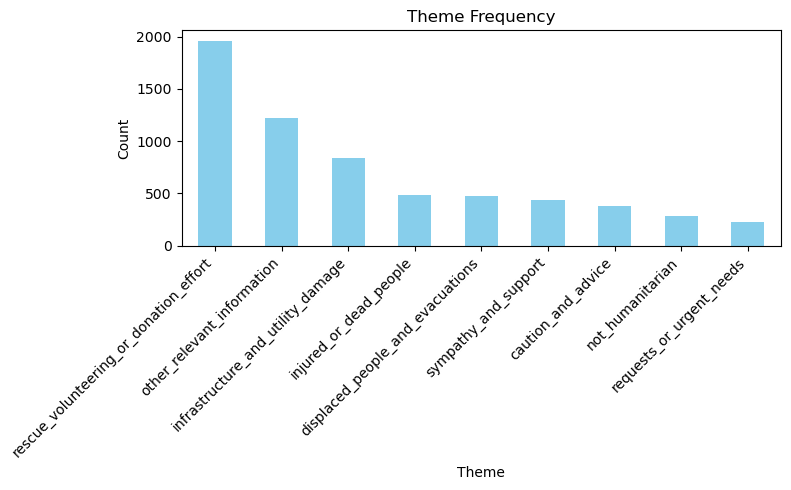

In [57]:
# Plot as a bar chart
counts.plot(kind='bar', figsize=(8, 5), color='skyblue')

plt.title('Theme Frequency')
plt.xlabel('Theme')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

It appears that the majority of the tweets focused on rescue, volunteering, or donation efforts, along with other relevant information. 

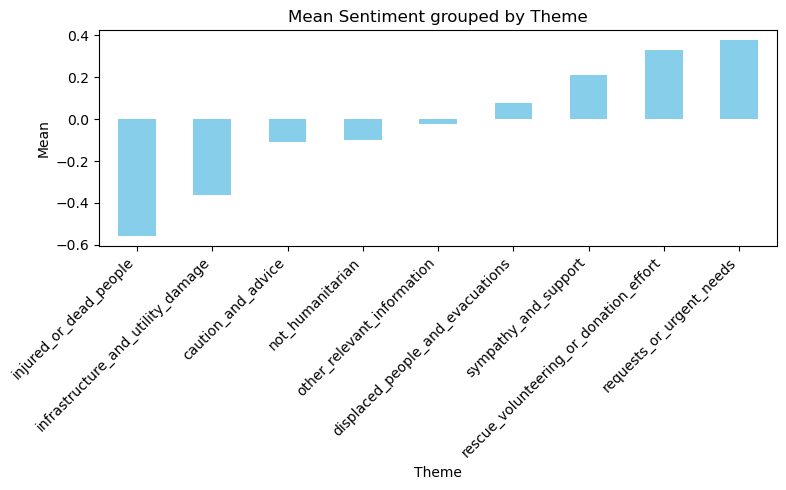

In [63]:
sentiment_by_class = event_df.groupby('class_label').sentiment.mean().sort_values()
sentiment_by_class.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Mean Sentiment grouped by Theme')
plt.xlabel('Theme')
plt.ylabel('Mean')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

When grouping tweets by theme, we can see that more negative sentiments involve tweets focused on injuries & death, infrastructure damage, and cautionary advice. 

# Plotting the Sentiment Groups

In [32]:
import seaborn as sns

<Axes: ylabel='Count'>

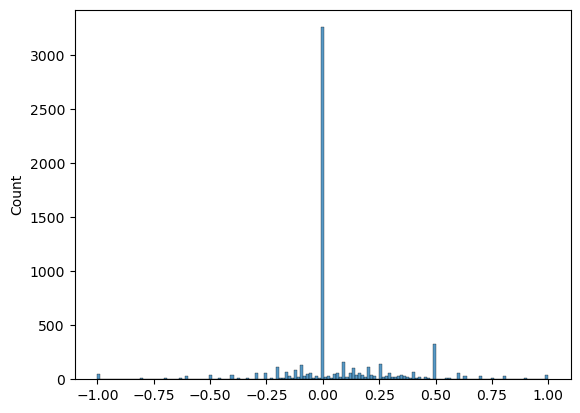

In [33]:
sns.histplot(event_sentiment)

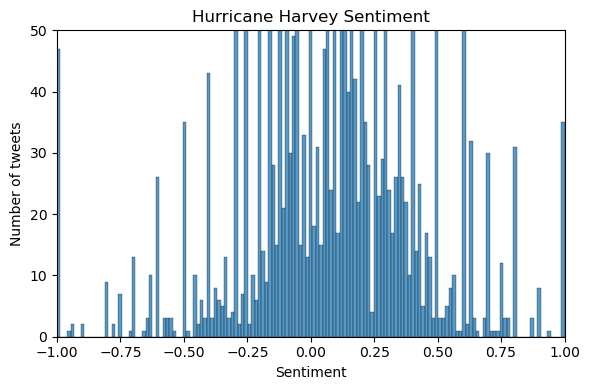

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))  # single subplot
sns.histplot(event_sentiment, ax=ax)
ax.set_title('Hurricane Harvey Sentiment')
ax.set_ylim(0, 50)
ax.set_xlim(-1, 1)
ax.set_ylabel('Number of tweets')
ax.set_xlabel('Sentiment')
fig.tight_layout()
plt.show()

It appears that overall, the tweets posted during and after the disaster event tend to have a more neutral or trending slightly positive distribution on a normal curve. As noted earlier, the overall mean sentiment is 0.029499 for this sample. 

# Topic Modeling

In [35]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

swords = stopwords.words('english')
# Apply tokenization and stopword removal to each row in the column
event_df['bag_o_words'] = event_df['cleaned_text'].apply(
    lambda cap: [word for word in word_tokenize(cap.lower()) if word not in swords and word.isalpha()]
)

In [36]:
event_df.head()

,tweet_id,tweet_text,class_label,cleaned_text,sentiment,date,bag_o_words
0,903388763073720321,"Hurricane Harvey killed at least 38 people, bu...",injured_or_dead_people,Hurricane Harvey killed at least 38 people but...,0.2845,2017-08-31 22:47:19.925,"[hurricane, harvey, killed, least, people, cha..."
1,901136425348759552,Harvey upped to Category 2 hurricane with 110+...,other_relevant_information,Harvey upped to Category 2 hurricane with 110 ...,0.0000,2017-08-25 17:37:20.765,"[harvey, upped, category, hurricane, mph, wind..."
2,902853707607535616,A huge shoutout @TexasGuard for all the work y...,rescue_volunteering_or_donation_effort,A huge shoutout for all the work your Soldiers...,0.4019,2017-08-30 11:21:12.761,"[huge, shoutout, work, soldiers, help, victims]"
3,902859729701044224,Our thoughts and prayers are with the people h...,sympathy_and_support,Our thoughts and prayers are with the people h...,0.0000,2017-08-30 11:45:08.540,"[thoughts, prayers, people, hit, hurricane, ha..."
4,901405975856414720,Homes destroyed on Broadway St in Rockport. Pe...,infrastructure_and_utility_damage,Homes destroyed on Broadway St in Rockport Peo...,-0.1027,2017-08-26 11:28:26.614,"[homes, destroyed, broadway, st, rockport, peo..."


In [37]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
#help(gensim.models.LdaMulticore)

In [38]:
wordlists = event_df['bag_o_words'].tolist()

# 1. Create the dictionary
dictionary = gensim.corpora.Dictionary(wordlists)

# 2. Filter rare and common tokens (optional but recommended)
dictionary.filter_extremes(no_below=5, no_above=0.5)

# 3. Create the corpus (Bag-of-Words format)
corpus = [dictionary.doc2bow(text) for text in wordlists]

# 4. Fit the LDA model
model = gensim.models.LdaMulticore(corpus, id2word=dictionary, num_topics=5)

# 5. Print topics
for idx, topic in model.print_topics(num_words=8):
    print(f"Topic #{idx + 1}: {topic}")

Topic #1: 0.037*"harvey" + 0.033*"hurricane" + 0.017*"houston" + 0.015*"texas" + 0.014*"help" + 0.014*"damage" + 0.012*"amp" + 0.012*"flooding"
Topic #2: 0.052*"hurricane" + 0.049*"harvey" + 0.018*"help" + 0.016*"amp" + 0.015*"victims" + 0.013*"flooding" + 0.013*"texas" + 0.013*"damage"
Topic #3: 0.021*"harvey" + 0.019*"flooding" + 0.017*"amp" + 0.015*"hurricane" + 0.014*"help" + 0.014*"damage" + 0.012*"need" + 0.012*"rt"
Topic #4: 0.025*"hurricane" + 0.021*"harvey" + 0.014*"help" + 0.011*"people" + 0.011*"relief" + 0.011*"water" + 0.010*"need" + 0.009*"victims"
Topic #5: 0.051*"harvey" + 0.046*"hurricane" + 0.031*"texas" + 0.025*"help" + 0.016*"relief" + 0.015*"houston" + 0.011*"flooding" + 0.010*"people"


In [39]:
# Find the index of the first row where 'amp' appears in the list
idx = event_df[event_df['bag_o_words'].apply(lambda x: 'amp' in x)].index[0]

# Optionally, show that row
print(event_df.loc[idx])
print(event_df.loc[idx, 'bag_o_words'])  # full token list
print(event_df.loc[idx, 'tweet_text'])  # full tweet text

tweet_id                                       901405975856414720
tweet_text      Homes destroyed on Broadway St in Rockport. Pe...
class_label                     infrastructure_and_utility_damage
cleaned_text    Homes destroyed on Broadway St in Rockport Peo...
sentiment                                                 -0.1027
date                                   2017-08-26 11:28:26.614000
bag_o_words     [homes, destroyed, broadway, st, rockport, peo...
Name: 4, dtype: object
['homes', 'destroyed', 'broadway', 'st', 'rockport', 'people', 'seen', 'street', 'huddling', 'amp', 'hugging']
Homes destroyed on Broadway St in Rockport. People seen on street huddling &amp; hugging. #HurricaneHarvey #Texas


In [40]:
# figured out the words after running the LDA model below
words_to_exclude = ['texas','houston','harvey','hurricane', 'rt', 'amp', 'hurricaneharvey', 'w']

wordlists = [
    [word for word in doc if word not in words_to_exclude]
    for doc in event_df['bag_o_words']
]

In [42]:
# 1. Create the dictionary
dictionary = gensim.corpora.Dictionary(wordlists)

# 2. Filter rare and common tokens (optional but recommended)
dictionary.filter_extremes(no_below=5, no_above=0.5)

# 3. Create the corpus (Bag-of-Words format)
corpus = [dictionary.doc2bow(text) for text in wordlists]

# 4. Fit the LDA model
model = gensim.models.LdaMulticore(corpus, id2word=dictionary, num_topics=5, workers = 4) #worker = number of cores to use
# crashing: model = gensim.models.LdaMulticore(corpus, id2word=dictionary, num_topics=5)
## model = gensim.models.LdaModel(corpus, id2word=dictionary, num_topics=5) #worker = number of cores to use, check if in lda mo


# 5. Print topics
for idx, topic in model.print_topics(num_words=8):
    print(f"Topic #{idx + 1}: {topic}")

Topic #1: 0.035*"help" + 0.015*"flooding" + 0.013*"victims" + 0.013*"relief" + 0.012*"please" + 0.011*"damage" + 0.010*"affected" + 0.009*"shelter"
Topic #2: 0.026*"help" + 0.018*"need" + 0.015*"flood" + 0.015*"relief" + 0.011*"flooding" + 0.010*"affected" + 0.010*"water" + 0.009*"emergency"
Topic #3: 0.026*"flooding" + 0.015*"damage" + 0.011*"floods" + 0.010*"storm" + 0.009*"help" + 0.009*"affected" + 0.009*"please" + 0.009*"donate"
Topic #4: 0.020*"damage" + 0.016*"help" + 0.014*"flooding" + 0.014*"relief" + 0.013*"people" + 0.012*"donate" + 0.010*"via" + 0.010*"destroyed"
Topic #5: 0.020*"water" + 0.018*"help" + 0.018*"toll" + 0.017*"death" + 0.012*"victims" + 0.011*"people" + 0.011*"relief" + 0.010*"affected"


In [43]:
import pyLDAvis
import pyLDAvis.gensim_models   # note that in previous versions this was called pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.014331 -0.000698       1        1  22.204507
2     -0.003660 -0.023124       2        1  21.226943
3     -0.044786 -0.041823       3        1  20.040782
4      0.079668 -0.008896       4        1  19.358155
1     -0.016890  0.074541       5        1  17.169613, topic_info=          Term        Freq       Total Category  logprob  loglift
312       toll  215.000000  215.000000  Default  30.0000  30.0000
310      death  209.000000  209.000000  Default  29.0000  29.0000
167      flood  218.000000  218.000000  Default  28.0000  28.0000
21   destroyed  110.000000  110.000000  Default  27.0000  27.0000
11        help  861.000000  861.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
512    damaged   28.693217  108.717031   Topic5  -5.5024   0.4299
136     damage   52.532163  520.395020   Topic5  -4.8977  -0.5311
354   donating   27.988972  116.489880   Topic5  -5.5273   0.3360
108    efforts   30.125609  188.840774   Topic5  -5.4537  -0.0735
246         tx   29.365616  197.347579   Topic5  -5.4793  -0.1431

[384 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1376      2  0.770080   account
1376      5  0.154016   account
27        1  0.153801       act
27        2  0.615204       act
636       1  0.099562  actually
...     ...       ...       ...
94        1  0.234613   working
94        2  0.039102   working
94        3  0.156409   working
94        4  0.410572   working
94        5  0.156409   working

[1047 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 5, 2])

In [ ]:
event_df.sentiment.hist()

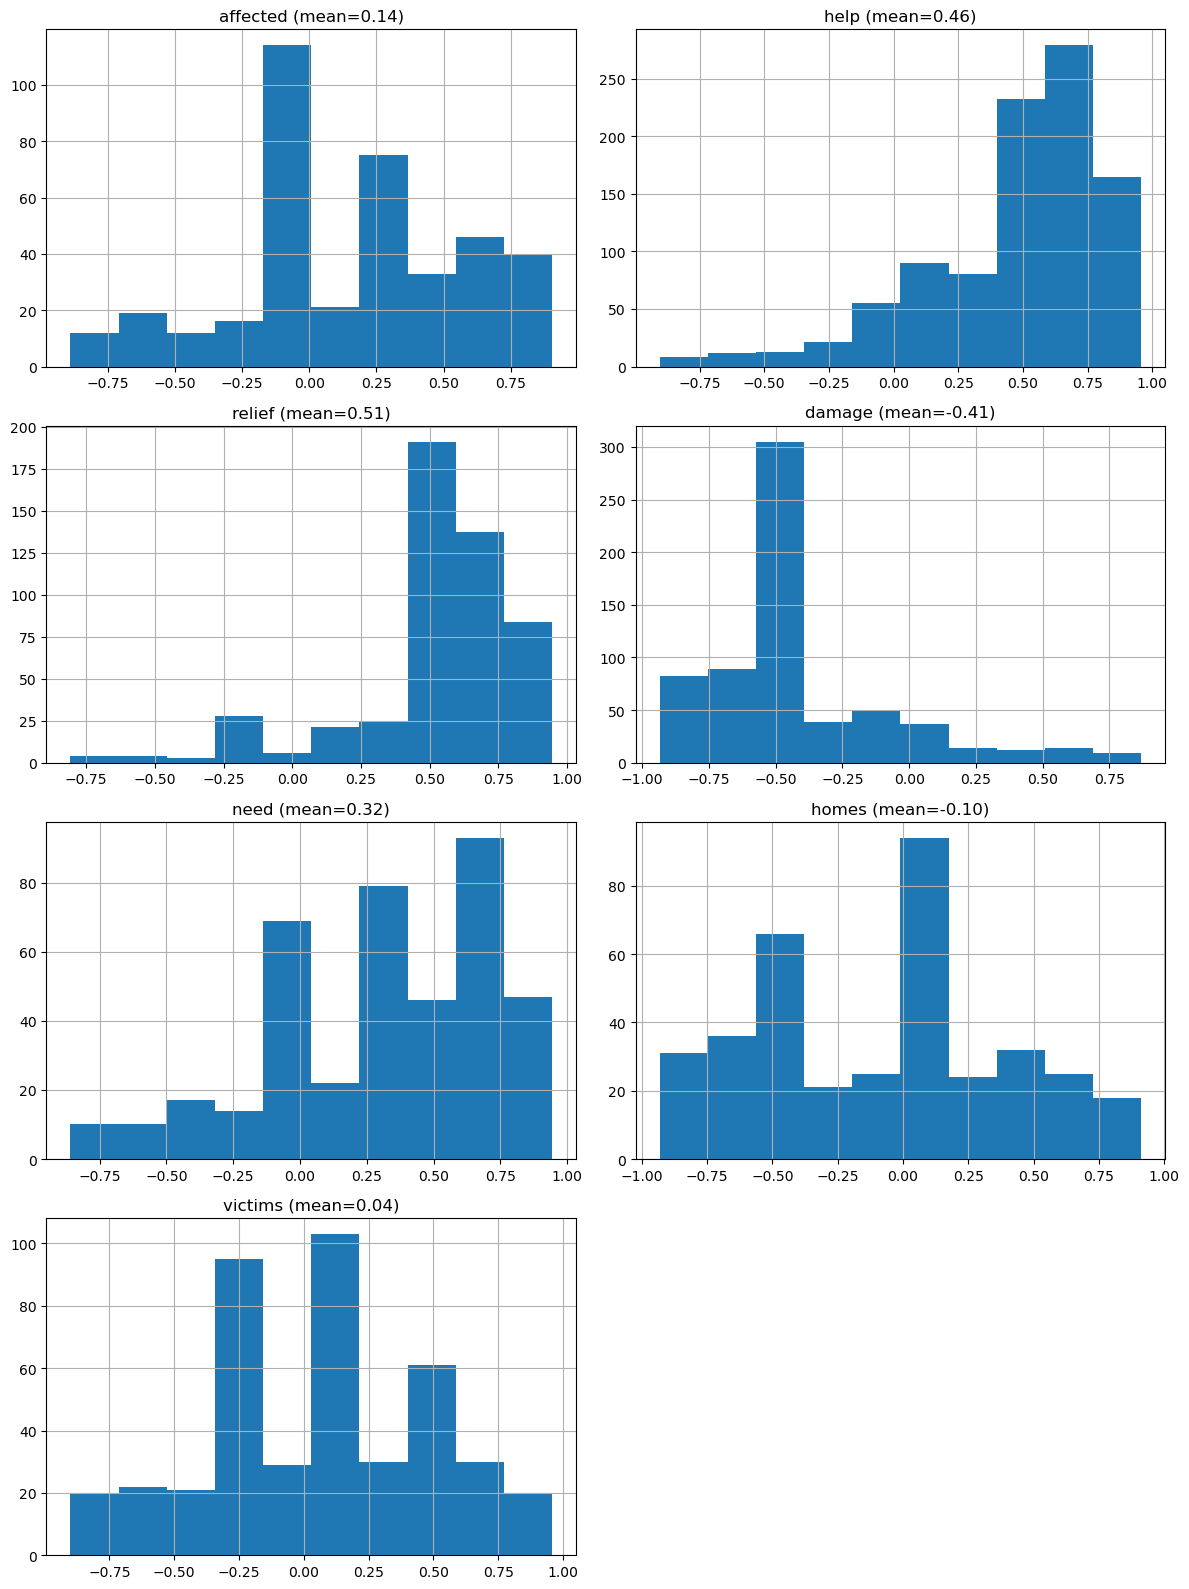

In [55]:
event_df2 = event_df
# what about by issue
event_df2['affected'] = event_df.cleaned_text.str.lower().str.contains('affect')
event_df2['help'] = event_df.cleaned_text.str.lower().str.contains('help')
event_df2['relief'] = event_df.cleaned_text.str.lower().str.contains('relief')
event_df2['damage'] = event_df.cleaned_text.str.lower().str.contains('damage')
event_df2['need'] = event_df.cleaned_text.str.lower().str.contains('need')
event_df2['homes'] = event_df.cleaned_text.str.lower().str.contains('home')
event_df2['victims'] = event_df.cleaned_text.str.lower().str.contains('victim')

# plot them
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
issues = ['affected', 'help', 'relief', 'damage', 'need', 'homes', 'victims']
for ii, issue in enumerate(issues):
    ax = axes.ravel()[ii]
    event_df2[event_df2[issue]].sentiment.hist(ax=ax)
    mean_score = event_df2[event_df2[issue]].sentiment.mean()
    ax.set_title(f"{issue} (mean={mean_score:.2f})")
fig.tight_layout()

# Hide the 8th (empty) subplot
if len(issues) < len(axes.ravel()):
    for j in range(len(issues), len(axes.ravel())):
        fig.delaxes(axes.ravel()[j])

Overall, tweets containing these various words tended to express a more positive or negative in the overall tweet. For example, comments containing help, need, and relief are more likely to be positive comments.  Affected, homes, and victims tended to have a more even dispersion of comments. Damage was most likely to be used in a negative context. 

# Part 2: Comparing sentiment across different disaster types

In [47]:
ca_wildfire = pd.read_csv('../../sentiment-analysis/cleaned_california_wildfires_tweets.csv')

In [48]:
ca_wildfire = pd.read_csv('../../sentiment-analysis/cleaned_california_wildfires_tweets.csv')
hurrican_sandy = pd.read_csv('../../sentiment-analysis/cleaned_hurrican_sandy_tweets.csv')
hurrican_mathew = pd.read_csv('../../sentiment-analysis/cleaned_hurrican_mathews_tweets.csv')
canda_wildfires = pd.read_csv('../../sentiment-analysis/cleaned_canda_wildfire_tweets.csv')
#italy_earthquake = pd.read_csv('../../sentiment-analysis/cleaned_italy_earthquake_tweets.csv')

In [49]:
disaster_datasets = {
    "California Wildfire": ca_wildfire,
    "Hurricane Sandy": hurrican_sandy,
    "Hurricane Matthew": hurrican_mathew,
    "Canada Wildfires": canda_wildfires,
   # "Italy Earthquake": italy_earthquake
}

for name, df in disaster_datasets.items():
    print(f"\n--- {name} ---")
    # Try to find the appropriate text column
    if 'text' in df.columns:
        text_col = 'text'
    elif 'tweet_text' in df.columns:
        text_col = 'tweet_text'
    elif 'cleaned_text' in df.columns:
        text_col = 'cleaned_text'
    else:
        print("No text column found.")
        continue
    sentiments = []
    for c in df[text_col]:
        sentiments.append(TextBlob(str(c)).sentiment.polarity)
    for i in range(min(20, len(df))):
        print("Sentiment:", round(sentiments[i], 2), "Comment:", df[text_col].iloc[i])



--- California Wildfire ---
Sentiment: 0.25 Comment: Entertainment Tonight Dave Grohl Delivers Food to First Responders Fighting California Wildfires via
Sentiment: -0.1 Comment: Residents are oftentimes left no choice but to leave their animals behind when wildfires strike We not only protect human lives and property but animals as well Firefighters ensured that there is plenty of food and water until residents can return to their homes
Sentiment: 0.09 Comment: HEADLINES BLAME THIS ON WILDFIRE BUT LOOKS LIKE CRIME AGAINST HUMANITY Buildings obliterated Cars melted Surrounding trees intact 84 confirmed dead 560 missing Residents warned against returning Area rich in gold diamonds
Sentiment: 0.39 Comment: Almost 200 Australian and NZ firefighters sent to help with US wildfires If you buy a Compact car great Environment friendly The government needs to be encouraging Trump is so backwards Why is it called EPA
Sentiment: -0.11 Comment: Police arrest suspect for setting off massive Califo

In [51]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

#for df in [hurrican_mathew, canda_wildfires, italy_earthquake]:
for df in [hurrican_mathew, canda_wildfires]:
    if 'cleaned_text' in df.columns:
        df['sentiment'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [66]:
canda_wildfires.head()

,tweet_id,tweet_text,class_label,cleaned_text,sentiment
0,735891446960623616,RT @DonBradshawNTV: How @MarshallAmpsUK came t...,other_relevant_information,RT How came to the assistance of Fort McMurray...,-0.2732
1,731202020296818688,Red Cross distributes $30M to Fort McMurray wi...,displaced_people_and_evacuations,Red Cross distributes 30M to Fort McMurray wil...,0.0000
2,733665357236342784,Interesting insights on the shifting communica...,other_relevant_information,Interesting insights on the shifting communica...,0.4019
3,731963038429929472,RT @globeandmail: Oil sands producers helping ...,rescue_volunteering_or_donation_effort,RT Oil sands producers helping workers affecte...,0.1531
4,728674838034944001,Ottawa to match Red Cross donations for Fort M...,rescue_volunteering_or_donation_effort,Ottawa to match Red Cross donations for Fort M...,0.0000


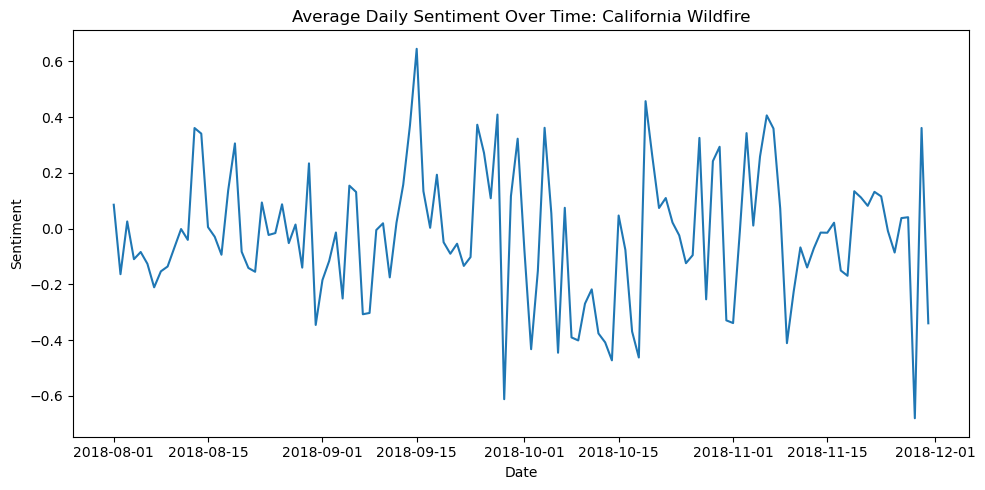

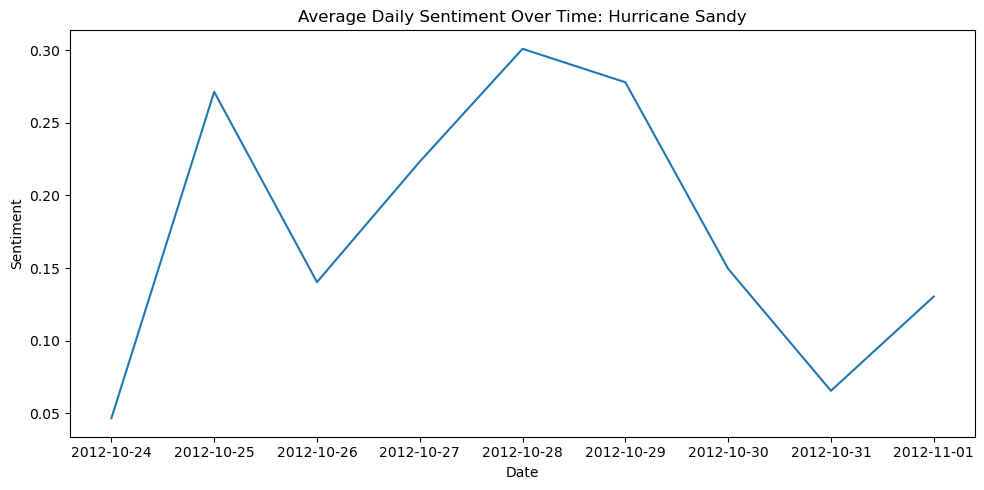

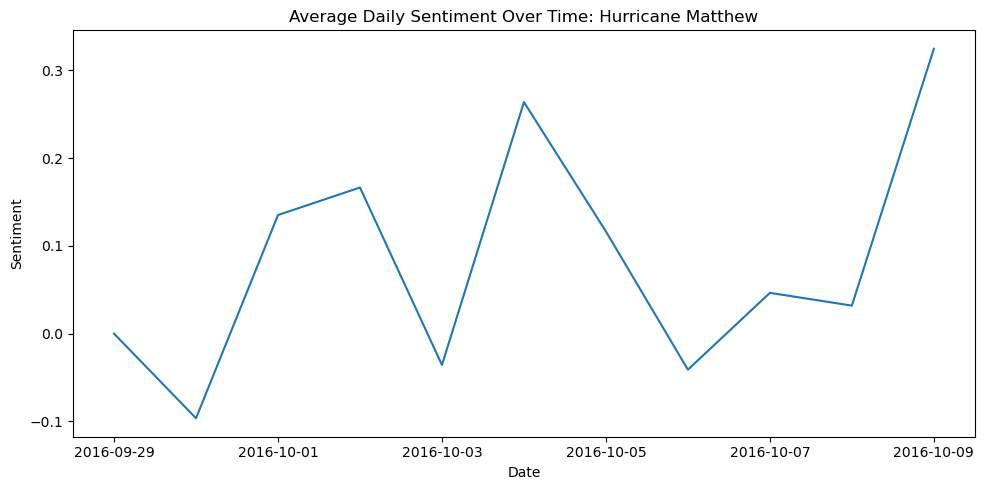

In [67]:
disaster_datasets = {
    "California Wildfire": ca_wildfire,
    "Hurricane Sandy": hurrican_sandy,
    "Hurricane Matthew": hurrican_mathew,
    "Canada Wildfires": canda_wildfires,
   # "Italy Earthquake": italy_earthquake
}

for name, df in disaster_datasets.items():
    if 'timestamp' in df.columns and 'sentiment' in df.columns:
        try:
            df['date'] = pd.to_datetime(df['timestamp'], unit='d', origin='1899-12-30')
        except Exception:
            df['date'] = pd.to_datetime(df['timestamp'], errors='coerce')
        sentiment_by_day = df.groupby(df['date'].dt.date)['sentiment'].mean()
        plt.figure(figsize=(10, 5))
        sentiment_by_day.plot()
        plt.title(f'Average Daily Sentiment Over Time: {name}')
        plt.ylabel('Sentiment')
        plt.xlabel('Date')
        plt.tight_layout()
        plt.show()

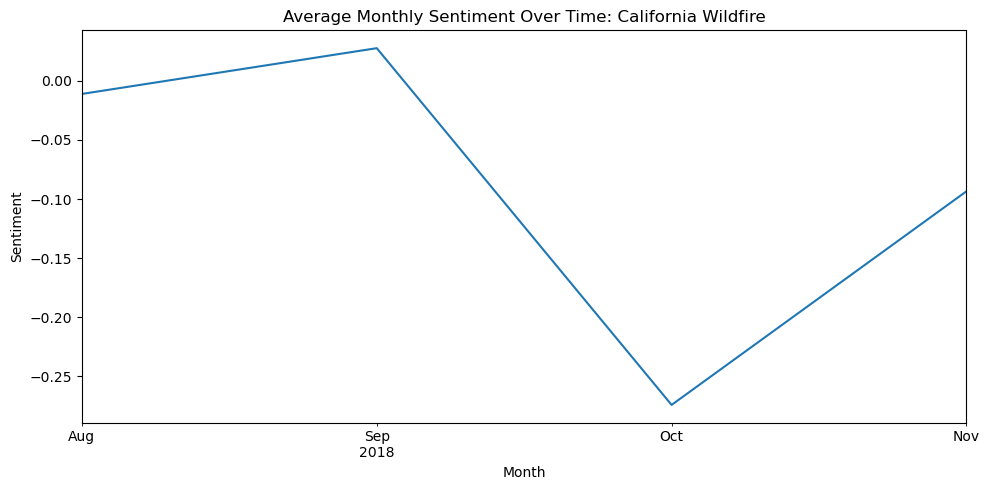

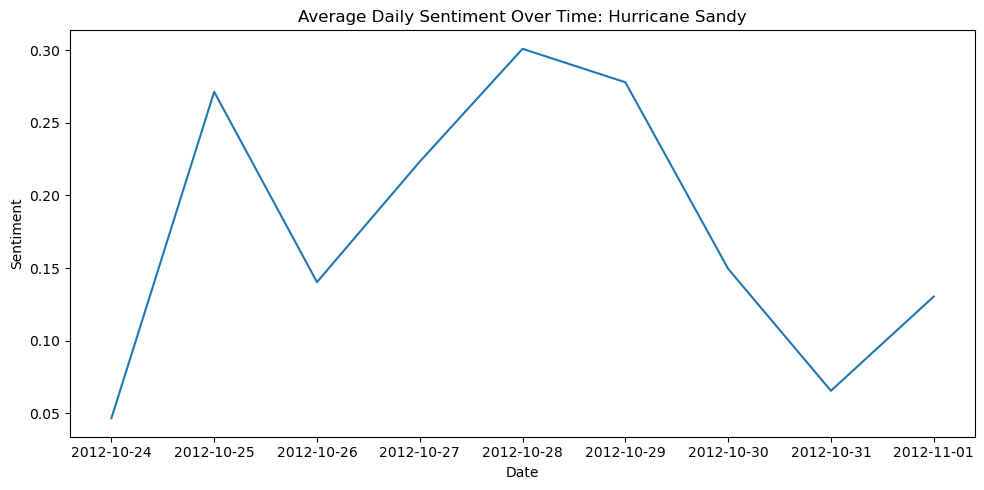

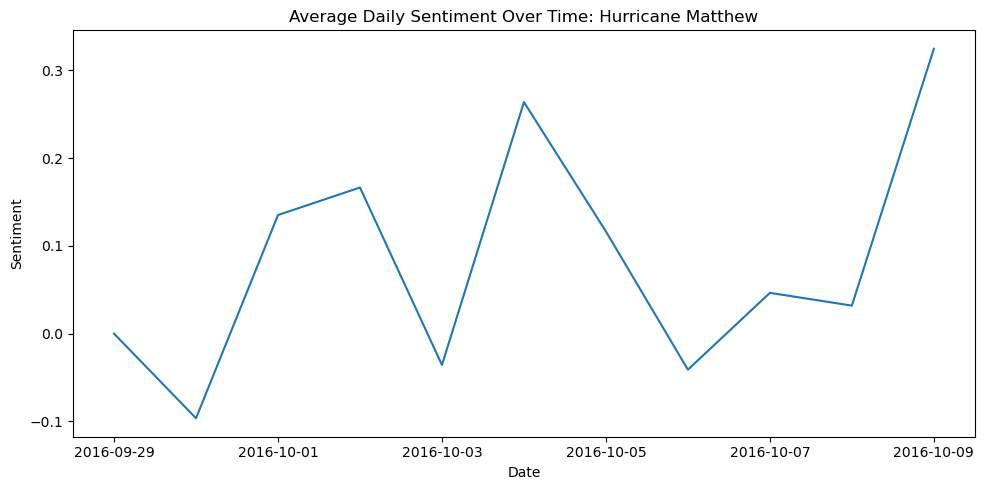

In [69]:
disaster_datasets = {
    "California Wildfire": ca_wildfire,
    "Hurricane Sandy": hurrican_sandy,
    "Hurricane Matthew": hurrican_mathew,
    #"Canada Wildfires": canda_wildfires, (timestamp not in cleaned file- its in Nick's original file)
   # "Italy Earthquake": italy_earthquake (also missing this in github temporarily)
}

for name, df in disaster_datasets.items():
    if 'timestamp' in df.columns and 'sentiment' in df.columns:
        try:
            df['date'] = pd.to_datetime(df['timestamp'], unit='d', origin='1899-12-30')
        except Exception:
            df['date'] = pd.to_datetime(df['timestamp'], errors='coerce')
        plt.figure(figsize=(10, 5))
        if name == "California Wildfire":
            sentiment_by = df.groupby(df['date'].dt.to_period('M'))['sentiment'].mean()
            sentiment_by.plot()
            plt.title(f'Average Monthly Sentiment Over Time: {name}')
            plt.xlabel('Month')
        else:
            sentiment_by = df.groupby(df['date'].dt.date)['sentiment'].mean()
            sentiment_by.plot()
            plt.title(f'Average Daily Sentiment Over Time: {name}')
            plt.xlabel('Date')
        plt.ylabel('Sentiment')
        plt.tight_layout()
        plt.show()

These charts indicate how much sentiment changes on a day to day basis post-event. 

The California Wildfires sentiment is shown in months in this code snippet, given that the data set captures a longer time frame. The dramatic drop off in October could be related to other wildfire events occuring earlier that year. However, its not exactly clear what caused the sentiment to drop in October given that there was a lull in the fire season at that time. Further investigation on the tweets are needed to see what happened in that time period. 


Top words for California Wildfire:


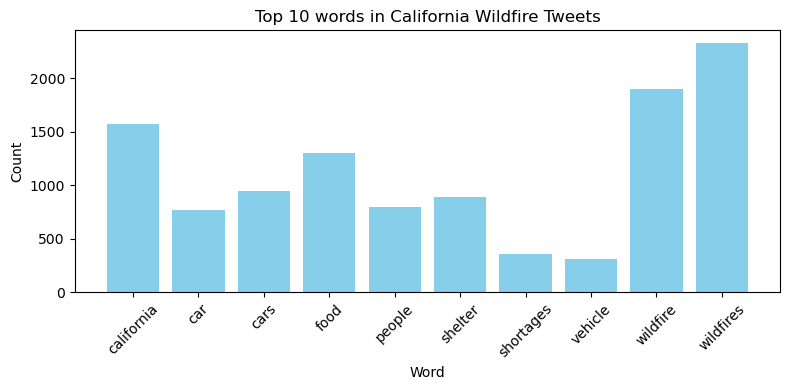


Top words for Hurricane Sandy:


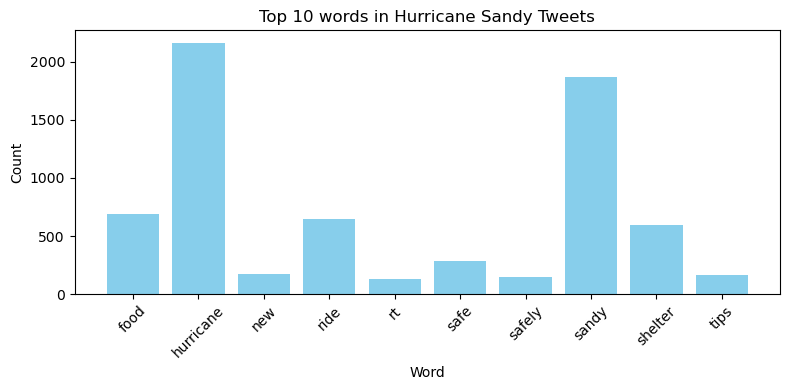


Top words for Hurricane Matthew:


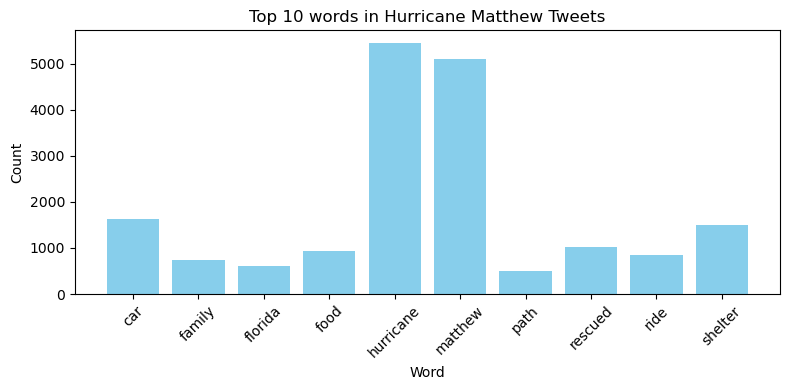


Top words for Canada Wildfires:


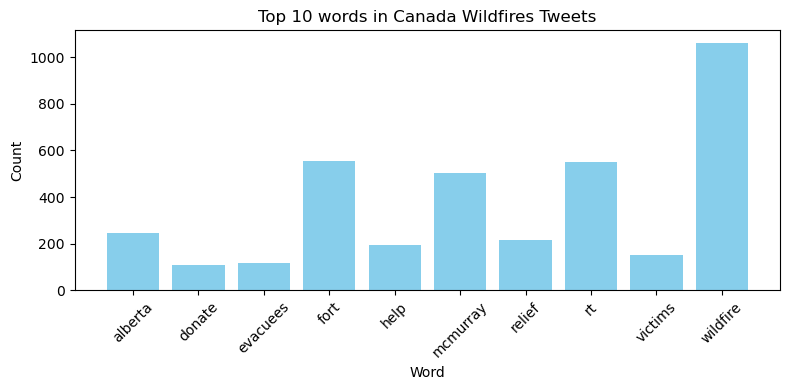

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

for name, df in disaster_datasets.items():
    print(f"\nTop words for {name}:")
    if 'cleaned_text' in df.columns:
        texts = df['cleaned_text'].dropna().astype(str).tolist()
        vectorizer = CountVectorizer(stop_words='english', max_features=10)
        X = vectorizer.fit_transform(texts)
        word_counts = X.toarray().sum(axis=0)
        words = vectorizer.get_feature_names_out()
        plt.figure(figsize=(8, 4))
        plt.bar(words, word_counts, color='skyblue')
        plt.title(f"Top 10 words in {name} Tweets")
        plt.xlabel("Word")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("No 'cleaned_text' column found.")

Each of these top 10 word combinations are different. Its worth exploring a bit more to understand why the context of the tweets might have been different for each event, and if there is any significance to that. 